In [241]:
import pandas as pd

In [242]:
# importação e limpeza de dados
df = pd.read_csv('seguro_saude.csv',decimal='.').drop(0,axis=0)

#forçando transformação de valores 
df['valor_seguro_saude'] = df['valor_seguro_saude'].astype(float)
df['imc'] = df['imc'].astype(float)
df['idade'] = df['idade'].astype(int)
df['crianca'] = df['crianca'].astype(int)

#removendo um registro com regiao = '1'
df = df[df['regiao'] != '1'] 

#removendo um registro com sexo = '2'
df = df[df['sexo'] != '2']


In [243]:
df.describe()

,idade,imc,crianca,valor_seguro_saude
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.220808,30.656411,1.096557,13285.074497
std,14.049507,6.097090,1.205650,12112.840958
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4744.325050
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.681250,2.000000,16687.364100
max,64.000000,53.130000,5.000000,63770.428010


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               1336 non-null   int32  
 1   sexo                1334 non-null   object 
 2   imc                 1336 non-null   float64
 3   crianca             1336 non-null   int32  
 4   fumante             1335 non-null   object 
 5   regiao              1335 non-null   object 
 6   valor_seguro_saude  1336 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 57.4+ KB


## 1. Qual o gasto total da operadora? 

In [245]:
vlr = round(df['valor_seguro_saude'].sum(),2)
print('O total gasto pela operadora é de R$'+str(vlr))

O total gasto pela operadora é de R$17748859.53


## 2. Qual a idade média dos usuários da operadora?


In [246]:
print('A média dos usuários da operadora é de '+ str(round(df['idade'].mean(),2))+' anos.')

A média dos usuários da operadora é de 39.22 anos.


## 3. Qual o gasto médio por região?


In [247]:
df[['regiao','valor_seguro_saude']].groupby('regiao').mean()

,valor_seguro_saude
regiao,
nordeste,12417.575374
norte,13406.384516
sudeste,12268.340243
sul,14760.277132


## 4. Qual faixa etária possui maior gasto com seguro saúde por região?


In [248]:
# df[['regiao','valor_seguro_saude','idade']].groupby(['idade','regiao']).mean()

df4 = df[['regiao','valor_seguro_saude','idade']].sort_values('valor_seguro_saude',ascending=False)

# Primeira resposta da pergunta 4
r4 = df4.groupby(['idade','regiao']).mean().sort_values('valor_seguro_saude', ascending=False)
r4

valor_seguro_saude
idade regiao                      
19    sul             35570.314200
61    sul             30238.455784
54    sul             29947.846324
43    sul             28860.922002
64    sudeste         27669.870200
...                            ...
30    norte            4481.032325
21    sudeste          4397.524000
      sul              4056.664759
26    nordeste         3157.814357
22    norte            2952.241964

[185 rows x 1 columns]

In [249]:
# Para responder melhor a pergunta 4, irei separar as idades em um range de idade que faça sentido para
# o ramo de planos de saúde.
# Achei um range utilizado para os reajustes de preços de planos de saúde no site idec.org.br


# https://idec.org.br/consultas/dicas-e-direitos/reajustes-de-planos-de-saude-por-faixa-etaria-saiba-seus-direitos?utm_campaign=DSA_|_Target_+35&utm_adgroup=DSA_|_Sa%C3%BAde&creative=252407851816&keyword=&gclid=CjwKCAjwhuCKBhADEiwA1HegOWWQoiu5Asfcdw0NArahI1ZD6xojIZgL7D85zhV7TMQBSSnAnx3dvxoCEA4QAvD_BwE
# #0 (zero) a 18 (dezoito) anos;
# 19 (dezenove) a 23 (vinte e três) anos;
# 24 (vinte e quatro) a 28 (vinte e oito) anos;
# 29 (vinte e nove) a 33 (trinta e três) anos;
# 34 (trinta e quatro) a 38 (trinta e oito) anos;
# 39 (trinta e nove) a 43 (quarenta e três) anos;
# 44 (quarenta e quatro) a 48 (quarenta e oito) anos;
# 49 (quarenta e nove) a 53 (cinquenta e três) anos;
# 54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
# 59 (cinquenta e nove) anos ou mais. 

def range_idade(idade):
    if idade <= 18:
        return '0-18'
    elif idade <= 23:
        return '19-23'
    elif idade <= 28:
        return '24-28'
    elif idade <= 33:
        return '29-33'
    elif idade <= 38:
        return '34-38'            
    elif idade <= 43:
        return '39-43'
    elif idade <= 48:
        return '44-48'
    elif idade <= 53:
        return '49-53'
    elif idade <= 58:
        return '54-58'
    else:
        return '59+'



In [250]:
# Aplicar a faixa de idade para cada registro
df['FaixaIdade'] = df['idade'].apply(range_idade)

In [251]:
# Fazendo uma resposta melhor para a pergunta 4

df4_2 = df[['regiao','valor_seguro_saude','FaixaIdade']].sort_values('valor_seguro_saude',ascending=False)

# Primeira resposta da pergunta 4
r4_2 = df4_2.groupby(['FaixaIdade','regiao']).mean().sort_values('valor_seguro_saude', ascending=False)

In [252]:
r4_2

valor_seguro_saude
FaixaIdade regiao                      
59+        sul             22717.271511
           sudeste         21124.828982
54-58      sul             20319.141998
59+        norte           19264.002663
           nordeste        19001.265151
44-48      sul             18481.014647
49-53      norte           17898.357708
44-48      nordeste        16422.184605
54-58      nordeste        16119.927459
49-53      sul             16020.219049
           nordeste        15973.971411
39-43      sul             15650.463921
54-58      norte           15438.112814
39-43      norte           14508.815178
34-38      norte           14403.767675
44-48      norte           13941.907722
19-23      sul             13484.219401
49-53      sudeste         12895.526397
29-33      sudeste         12770.773933
34-38      sudeste         12748.899254
54-58      sudeste         12701.607336
34-38      sul             12602.593260
44-48      sudeste         12498.867665
24-28      sul             11911.623288
29-33      nordeste        11335.217055
39-43      nordeste        11216.864778
           sudeste         10907.541748
29-33      norte           10524.144935
24-28      norte           10148.764783
           sudeste          9909.789131
29-33      sul              9546.450771
34-38      nordeste         9141.609592
19-23      norte            9113.936142
           nordeste         9006.469269
           sudeste          8057.693796
0-18       norte            7558.732497
           sul              6677.555986
24-28      nordeste         5930.103076

In [253]:
print('a utilização de faixa de idade parece fazer muito mais sentido para esse tipo de análise')

a utilização de faixa de idade parece fazer muito mais sentido para esse tipo de análise


## 5. Crianças tem gasto maior que adultos?

In [254]:
df5 = df[['crianca','valor_seguro_saude']].sort_values('valor_seguro_saude', ascending=False)
df5_r = df5.groupby('crianca').mean()

r5 = 'Não'


## 6. Qual a proporção de crianças por região?


In [255]:
total_criancas = df['crianca'].sum()


df6 = df[['regiao','crianca']].groupby('regiao').sum()

df6['prop %'] = round(df6['crianca'] / total_criancas,4)*100

In [256]:
df6

,crianca,prop %
regiao,,
nordeste,373,25.46
norte,339,23.14
sudeste,371,25.32
sul,382,26.08


## 7. O aumento da idade influencia no imc?


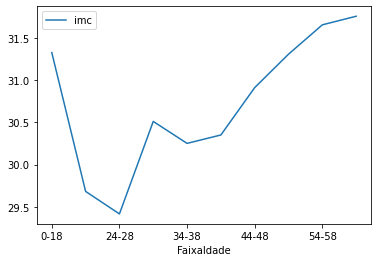

In [257]:
df[['FaixaIdade','imc']].groupby('FaixaIdade').mean().plot()

r7 = 'começa a aumentar depois dos 40 anos'

## 8. Quem tem maior gasto, homens ou mulheres?


In [258]:
df8 = df[['sexo','valor_seguro_saude']].groupby('sexo').mean()

r8 = 'homens gastam mais em media'

## 9. Se o usuário for mulher, o imc é acima ou abaixo da média?


In [259]:
media_geral = round(df['imc'].mean(),2)

media_fem = round(df[df['sexo'] == 'feminino']['imc'].mean(),2)

print('Se a usuária é mulher, o IMC é levemente menor que o masculino, Media Geral: '+str(media_geral)+', Média das mulheres: '+str(media_fem))

Se a usuária é mulher, o IMC é levemente menor que o masculino, Media Geral: 30.66, Média das mulheres: 30.37


## 10. Se for homem, com mais de 50 anos e da região Sudeste, o gasto é maior ou menor que a média de gastos da região?

In [260]:
df10 = df[df['regiao'] == 'sudeste']

# df.query('Compra=="B" & Pessoas=="2020" ')

df10_h_maior50 = df10.query('sexo=="masculino" & idade>50')

In [261]:
media_homem_maior50 = df10_h_maior50['valor_seguro_saude'].mean()
media_regiao = df10['valor_seguro_saude'].mean()

delta = str(round(((media_homem_maior50/media_regiao)-1)*100,2))+"%"

print('Na regiao sudeste, homens com mais de 50 anos gastam '+delta+' a mais que a media da regiao')
print('Media homem com mais de 50 no sudeste: '+str(round(media_homem_maior50,2)))
print('Media Regiao sudeste: '+str(round(media_regiao,2)))




Na regiao sudeste, homens com mais de 50 anos gastam 23.65% a mais que a media da regiao
Media homem com mais de 50 no sudeste: 15170.28
Media Regiao sudeste: 12268.34
